[Reference](https://towardsdatascience.com/10-things-you-didnt-know-about-pandas-d20f06d1bf6b)

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml

X,y = fetch_openml("autos", version=1, as_frame=True, return_X_y=True)
data = X
data['target'] = y
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,target
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,1
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,2
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,2


In [2]:
import numpy as np

pivot_table = pd.pivot_table(data, values='horsepower', index=['num-of-cylinders'],
                    columns=['target'], aggfunc=np.sum, fill_value=0)

print(pivot_table)

target             -2    -1     0     1     2     3
num-of-cylinders                                   
eight               0   155   184   472     0   155
five                0   369   393   360   225     0
four              390  1511  4340  3604  2518  1854
six                 0   552  1596   435     0  1303
three               0     0     0     0    48     0
twelve              0     0   262     0     0     0
two                 0     0     0     0     0   438


In [3]:
data.describe(include='all')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,target
count,164.000000,205,205,205,203,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000,205
unique,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
mean,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,NaN
std,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342,NaN
min,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,NaN
25%,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,NaN
50%,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,NaN
75%,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,NaN


In [4]:
round(data.corr(),2)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
normalized-losses,1.00,-0.07,0.02,0.11,-0.43,0.12,0.17,-0.04,0.07,-0.13,0.30,0.26,-0.26,-0.21,0.20
wheel-base,-0.07,1.00,0.87,0.80,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
length,0.02,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.56,-0.29,-0.67,-0.70,0.69
width,0.11,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.75
height,-0.43,0.59,0.49,0.28,1.00,0.30,0.07,0.18,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.14
curb-weight,0.12,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.83
engine-size,0.17,0.57,0.68,0.74,0.07,0.85,1.00,0.59,0.21,0.03,0.81,-0.24,-0.65,-0.68,0.87
bore,-0.04,0.49,0.61,0.56,0.18,0.65,0.59,1.00,-0.06,0.01,0.58,-0.26,-0.59,-0.59,0.54
stroke,0.07,0.16,0.13,0.18,-0.06,0.17,0.21,-0.06,1.00,0.19,0.09,-0.07,-0.04,-0.04,0.08
compression-ratio,-0.13,0.25,0.16,0.18,0.26,0.15,0.03,0.01,0.19,1.00,-0.21,-0.44,0.32,0.27,0.07


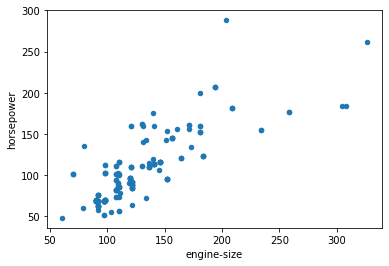

In [5]:
data.plot.scatter(x='engine-size', y='horsepower')

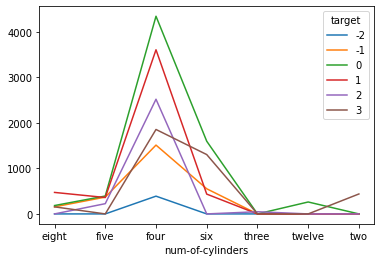

In [6]:
pivot_table.plot()

In [8]:
pip install pandas_bokeh

In [9]:
pd.options.plotting.backend = 'pandas_bokeh'

import pandas_bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

output_notebook()
p1 = data.plot_bokeh.scatter(x='engine-size', 
                              y='horsepower', 
                              category='target', 
                              title='Risk Rating by Engine Size Horsepower',
                              show_figure=False)
show(p1)

/usr/local/lib/python3.7/dist-packages/pandas_bokeh/plot.py:1331: UserWarning: There are more than 5 categories in the scatterplot. The legend might be crowded, to hide the axis you can pass 'legend=False' as an optional argument.
  "There are more than 5 categories in the scatterplot. The legend might be crowded, to hide the axis you can pass 'legend=False' as an optional argument."


In [10]:
target_groups = data.groupby('target').mean()
target_groups

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
target,,,,,,,,,,,,,,,
-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,103.000000,104.300000,188.800000,67.200000,56.200000,2964.000000,137.333333,3.726667,3.150000,8.833333,130.000000,5300.000000,21.333333,26.000000,15781.666667
-1,85.600000,106.068182,185.118182,67.731818,55.904545,2961.227273,146.363636,3.464545,3.353636,11.772727,117.590909,4877.272727,22.772727,27.272727,17330.681818
0,113.166667,101.119403,178.444776,66.235821,54.779104,2708.641791,134.671642,3.394328,3.219104,10.868657,102.651515,4970.454545,24.791045,30.029851,14397.092308
1,128.574468,95.912963,166.635185,65.048148,52.812963,2227.851852,109.444444,3.135000,3.260000,9.216852,90.203704,5281.481481,28.296296,34.018519,9648.653846
2,125.689655,96.237500,169.134375,65.093750,53.521875,2334.250000,113.656250,3.304375,3.269063,10.465625,90.032258,5120.967742,27.937500,34.156250,10109.281250
3,168.647059,94.992593,173.137037,66.148148,51.122222,2717.518519,141.259259,3.453478,3.251304,8.626296,138.888889,5379.629630,19.333333,25.333333,17221.296296


In [11]:
data_summary = data[['target', 'engine-size', 'horsepower', 'price']]
data_summary.head(10).style.format({ 
                          "engine-size": "{:20,.0f} cc", 
                          "horsepower": "{:20,.0f} hp",
                          "price":"${:20,.0f}"})

,target,engine-size,horsepower,price
0,3,130 cc,111 hp,"$ 13,495"
1,3,130 cc,111 hp,"$ 16,500"
2,1,152 cc,154 hp,"$ 16,500"
3,2,109 cc,102 hp,"$ 13,950"
4,2,136 cc,115 hp,"$ 17,450"
5,2,136 cc,110 hp,"$ 15,250"
6,1,136 cc,110 hp,"$ 17,710"
7,1,136 cc,110 hp,"$ 18,920"
8,1,131 cc,140 hp,"$ 23,875"
9,0,131 cc,160 hp,$ nan


In [12]:
data_summary.head(10).style.format({ 
                          "engine-size": "{:20,.0f} cc", 
                          "horsepower": "{:20,.0f} hp",
                          "price":"${:20,.0f}"})\
                    .background_gradient(cmap='viridis')

,target,engine-size,horsepower,price
0,3,130 cc,111 hp,"$ 13,495"
1,3,130 cc,111 hp,"$ 16,500"
2,1,152 cc,154 hp,"$ 16,500"
3,2,109 cc,102 hp,"$ 13,950"
4,2,136 cc,115 hp,"$ 17,450"
5,2,136 cc,110 hp,"$ 15,250"
6,1,136 cc,110 hp,"$ 17,710"
7,1,136 cc,110 hp,"$ 18,920"
8,1,131 cc,140 hp,"$ 23,875"
9,0,131 cc,160 hp,$ nan


In [13]:
pd.set_option("display.max_columns",100)
pd.set_option("display.precision",2)

In [14]:
data_summary.head(10).style.format({ 
                          "engine-size": "{:20,.0f} cc", 
                          "horsepower": "{:20,.0f} hp",
                          "price":"${:20,.0f}"})\
                    .background_gradient(cmap='viridis')\
                    .set_caption('First 10 Rows')

,target,engine-size,horsepower,price
0,3,130 cc,111 hp,"$ 13,495"
1,3,130 cc,111 hp,"$ 16,500"
2,1,152 cc,154 hp,"$ 16,500"
3,2,109 cc,102 hp,"$ 13,950"
4,2,136 cc,115 hp,"$ 17,450"
5,2,136 cc,110 hp,"$ 15,250"
6,1,136 cc,110 hp,"$ 17,710"
7,1,136 cc,110 hp,"$ 18,920"
8,1,131 cc,140 hp,"$ 23,875"
9,0,131 cc,160 hp,$ nan
